In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import pandas as pd
import csv

I split **test** and **train** data as below:

In [10]:
data = pd.read_csv("/Users/Nika/Desktop/ted_main.csv")
df = pd.DataFrame(data, columns=["duration"])
mask = np.random.rand(len(df)) <= 0.8
x_train = df[mask]
x_train = x_train.values.tolist()
x_train = np.reshape(x_train,(1,len(x_train)))
train_values = []
for i in range(len(x_train[0])):
    train_values.append(x_train[0][i])
train_values.sort()
x_train = pd.DataFrame(train_values,columns=['duration'])

x_test = df[~mask]
x_test = x_test.values.tolist()
x_test = np.reshape(x_test,(1,len(x_test)))
test_values = []
for i in range(len(x_test[0])):
    test_values.append(x_test[0][i])
test_values.sort()
x_test = pd.DataFrame(test_values,columns=['duration'])



I define different parzen window sizes and plot them as below, using the **KDE** model:

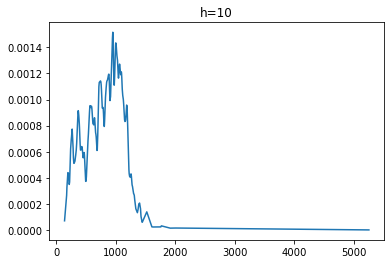

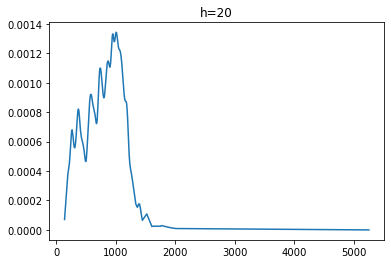

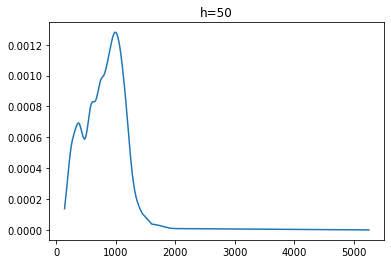

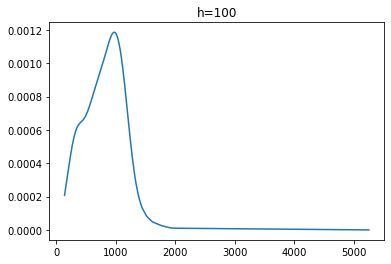

In [11]:
bandwidths = [10, 20, 50, 100]
for b in (bandwidths):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.plot(x_test, np.exp(score))
    plt.title("h="+str(b))
    plt.show()

Then, I test the data with different values of **n**:

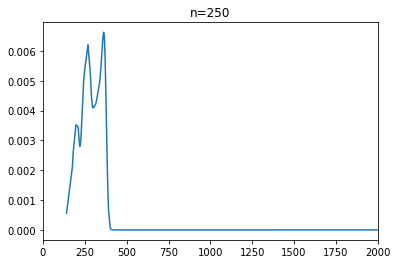

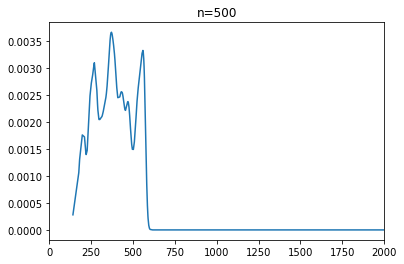

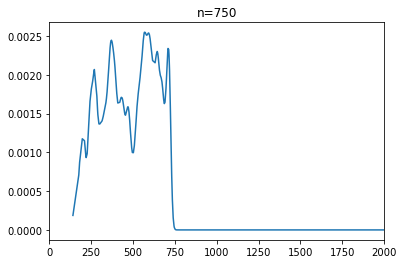

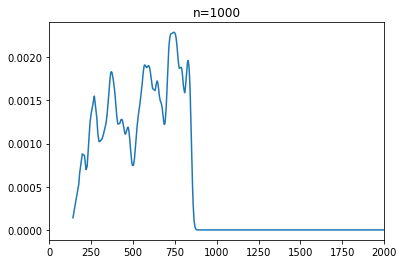

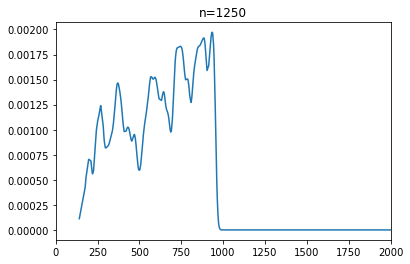

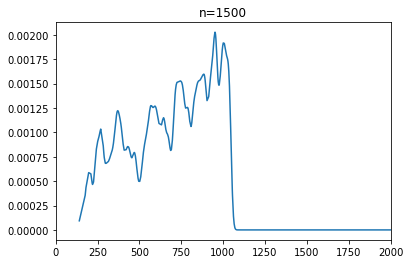

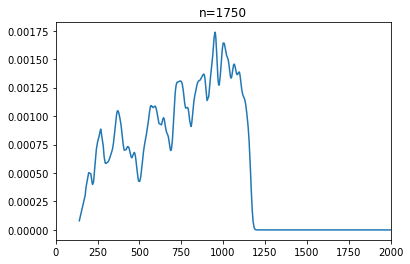

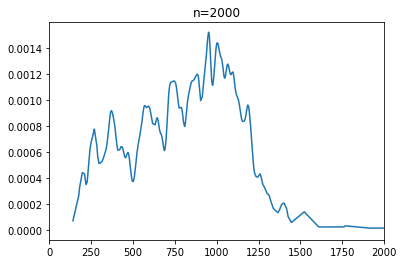

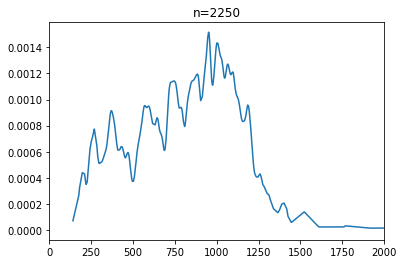

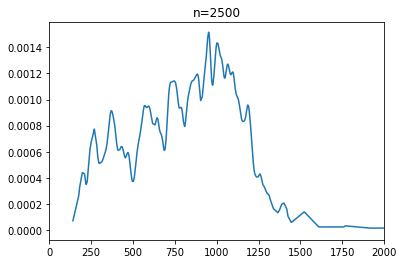

In [15]:
import numpy as np
import random

duration_list = df.duration.to_list()

for n in range(250,len(duration_list),250):
    x_train_new = [None] * n
    x_train_new = x_train[0:n]
    kde_model = KernelDensity(kernel='gaussian', bandwidth=10)
    kde_model.fit(x_train_new)
    score = kde_model.score_samples(x_test)
    plt.xlim(0,2000)
    plt.plot(x_test, np.exp(score))
    plt.title("n="+str(n))
    plt.show()

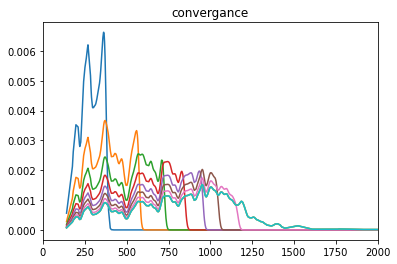

In [14]:
for n in range(250,len(duration_list),250):
    x_train_new = [None] * n
    x_train_new = x_train[0:n]
    kde_model = KernelDensity(kernel='gaussian', bandwidth=10)
    kde_model.fit(x_train_new)
    score = kde_model.score_samples(x_test)
    plt.xlim(0,2000)
    plt.plot(x_test, np.exp(score))
    plt.title("convergance")
    plt.plot()

Comparing the results of the first and second part:


As it can be seen in both implementations, by increasing the size of the window, our model becomes smoother, which is expexted according to what we have learned in the class.


Also it can be seen that by increasing the size of our train data, the model becomes **more similar** to the actual model and also **smoother**, since more data is used for the model to learn.